In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics


## suppress warnings for this demo
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

<Axes: >

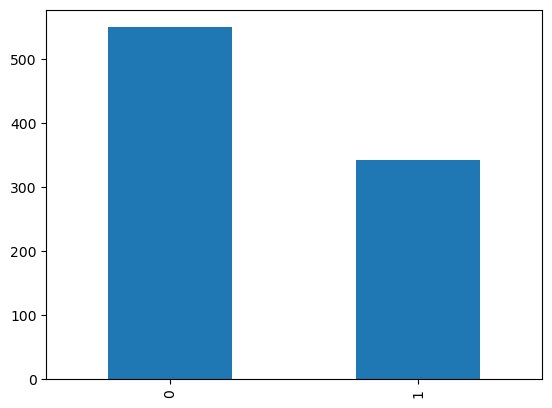

In [6]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Pclass', ylabel='Count'>

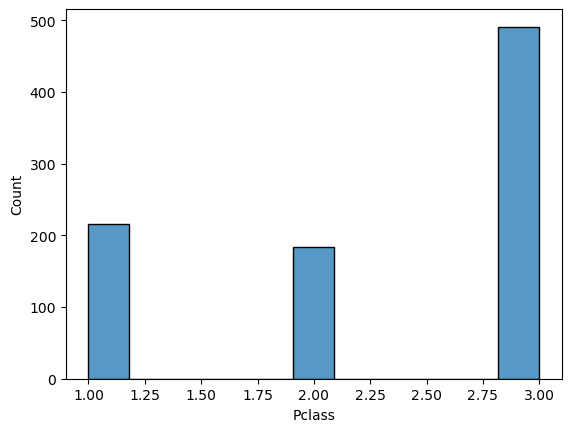

In [7]:
import seaborn as sns

sns.histplot(df['Pclass'])

<Axes: xlabel='Pclass', ylabel='count'>

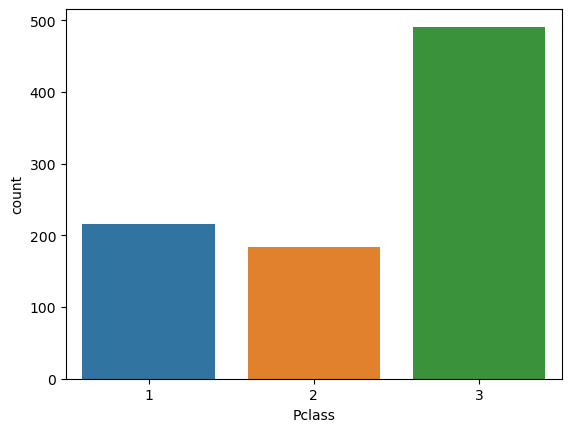

In [8]:
sns.countplot(df, x="Pclass")

male      577
female    314
Name: Sex, dtype: int64

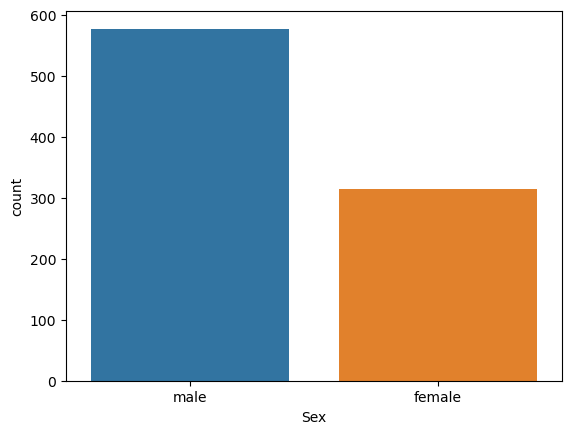

In [9]:
sns.countplot(df, x="Sex")
df['Sex'].value_counts()

<Axes: xlabel='Embarked', ylabel='count'>

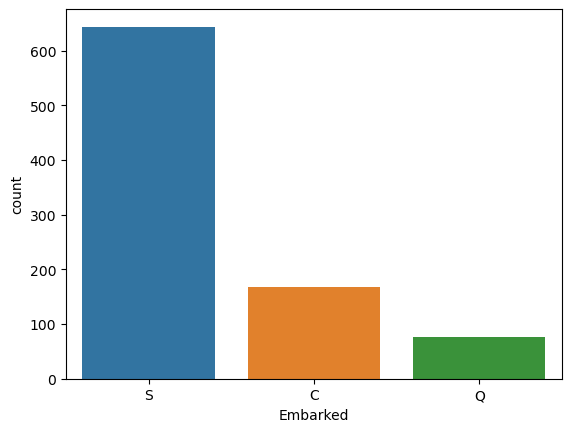

In [10]:
sns.countplot(df, x="Embarked")

<Axes: xlabel='SibSp', ylabel='count'>

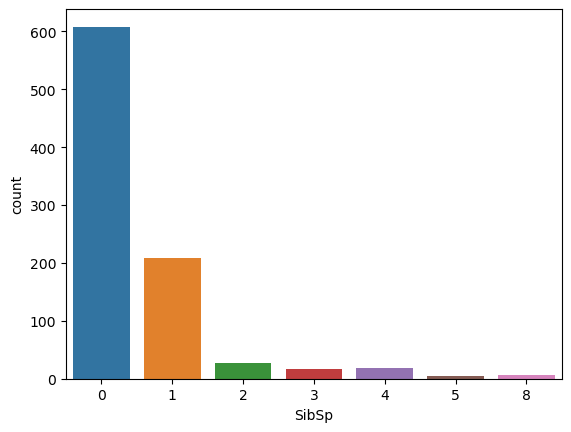

In [11]:
sns.countplot(df, x="SibSp")

<Axes: ylabel='SibSp'>

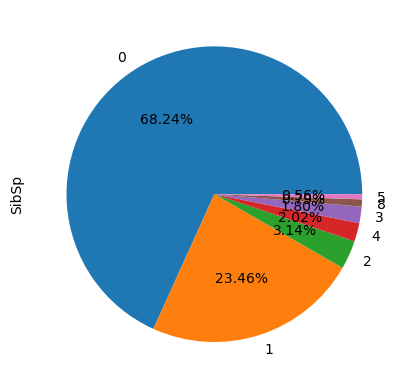

In [12]:
df['SibSp'].value_counts().plot(kind = 'pie' , autopct='%.2f%%')

In [13]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: xlabel='Parch', ylabel='count'>

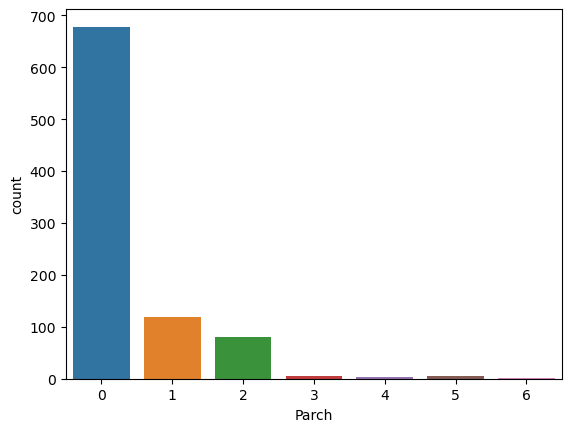

In [14]:
sns.countplot(df , x='Parch')

<Axes: ylabel='Parch'>

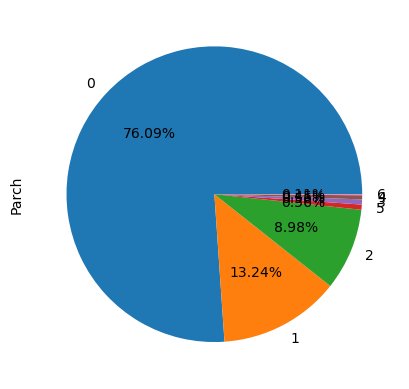

In [15]:
df['Parch'].value_counts().plot(kind = 'pie' , autopct='%.2f%%')

In [16]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [17]:
import matplotlib.pyplot as plt